<a href="https://colab.research.google.com/github/ev-greshkina/DataAnalyst-educational-course/blob/main/%D0%94%D0%97_%D0%BA_%D0%B7%D0%B0%D0%BD%D1%8F%D1%82%D0%B8%D1%8E_12_v_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Практика

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
import math
from statsmodels.stats.weightstats import zconfint
%matplotlib inline

## ЦПТ для различных распределений
Возьмите то непрерывное распределение, которое вам больше всего понравится из списка доступных в модуле [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html).

### Сгенерируйте примеры из распределения

In [ ]:
# Принятое распределение - непрервная случайная величина Лапласа
laplace_rv = sts.laplace()
sample = laplace_rv.rvs(100)
sample

array([-1.5652732 , -0.02810906, -0.69525956, -0.31228562, -0.46979385,
        5.03285613,  0.42362383,  0.82008653, -2.26600253,  0.20295602,
       -3.05634489,  0.45058873, -2.53132063, -0.43948625,  0.97074647,
        4.01955817,  0.8302547 , -0.69243135, -0.17068117, -0.72011065,
       -0.61074628, -2.99984049,  2.5847504 ,  0.33508613, -1.69989901,
       -1.54371574, -0.04864085, -2.48502922, -1.09476028,  0.5487988 ,
       -0.04391663, -0.77219542,  0.53197417,  1.61162034, -1.31607744,
        0.78733529, -1.41497591,  1.41200329, -1.32688729,  0.09766703,
       -1.07283304,  0.58248989,  0.39608943,  1.38755061,  1.44829543,
        1.21367606, -0.3406621 , -2.34192018,  1.2983032 , -0.39820961,
        1.57735508, -0.58665526, -0.06258476,  0.5452938 ,  0.24135844,
       -0.61364675,  0.1152342 ,  0.18369547, -0.75472287, -1.18354567,
       -0.67066113, -0.89187151, -2.10882845, -2.20128973,  1.35786497,
       -3.3918676 ,  0.03835905,  2.80643054, -0.01771026, -0.37

In [ ]:
sample.dtype

dtype('float64')

In [ ]:
# Настоящее среднее случайной величины
real_mean = laplace_rv.mean()

In [ ]:
# Настоящая дисперсия случайной величины
real_var = laplace_rv.var()

### Постройте гистограмму выборки и теоретическую плотность распределения

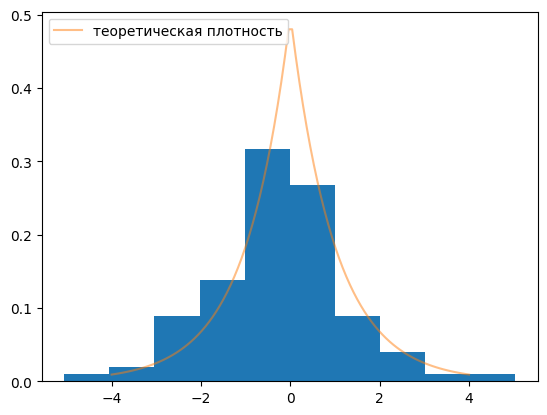

In [ ]:
# Построить гистограмму выборки
plt.hist(sample, density=True)
x = np.linspace(-4,4,100)
pdf = laplace_rv.pdf(x)
plt.plot(x, pdf, label='теоретическая плотность', alpha=0.5)
plt.legend()

In [ ]:
# Выборочное среднее
sample_mean = sample.mean()
print(sample_mean)
# Выборочная дисперсия
sample_var = sample.var()
print(sample_var)

-0.20286754577507093
2.2528011410316426


### Оценим распределение выборочного среднего для разных объёмов выборок
Для этого постройте на одном полотне гистограмму выборочных средних и теоретическое распределение выборочных средних по ЦПТ для разных объёмов выборок.

Для теоретического распределение используйте настоящие значения мат ожидания и дисперсии (не приближенные на основе выборки).

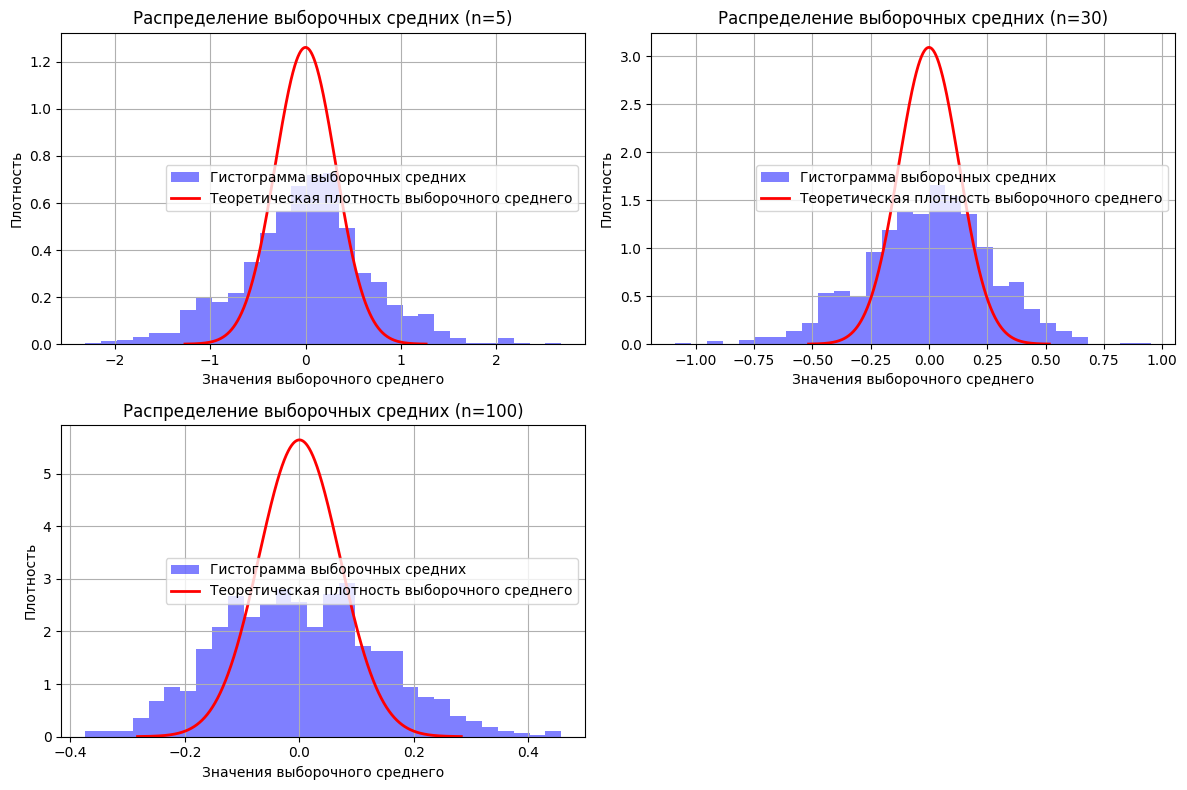

In [ ]:
# Параметры распределения
loc = 0   # сдвиг (математическое ожидание)
scale = 1  # масштаб (стандартное отклонение)

# Размеры выборок
sample_sizes = [5, 30, 100]
# Количество испытаний
n_trials = 1000

plt.figure(figsize=(12, 8))

for i, n in enumerate(sample_sizes):
    means = []
    for _ in range(n_trials):
        sample = np.random.laplace(loc, scale, n)
        means.append(np.mean(sample))

    # Плотность теоретического распределения выборочного среднего
    mean_mu = 0  # мат ожидание выборочного среднего
    mean_sigma = 1 / np.sqrt(2 * n)  # стандартное отклонение выборочного среднего
    x_means = np.linspace(mean_mu - 4*mean_sigma, mean_mu + 4*mean_sigma, 1000)
    pdf_means = sts.norm.pdf(x_means, mean_mu, mean_sigma)

    # Построение гистограммы выборочных средних и теоретической плотности
    plt.subplot(2, 2, i + 1)
    plt.hist(means, bins=30, density=True, alpha=0.5, color='blue', label='Гистограмма выборочных средних')
    plt.plot(x_means, pdf_means, 'r-', lw=2, label='Теоретическая плотность выборочного среднего')
    plt.title(f'Распределение выборочных средних (n={n})')
    plt.xlabel('Значения выборочного среднего')
    plt.ylabel('Плотность')
    plt.legend()
    plt.grid()

plt.tight_layout()
plt.show()

Как вы считаете, для выбранного распределения апроксимация распределения выборочного среднего работает хорошо или плохо?
**Ваш ответ:**

In [ ]:
# В целом, апроксимация значений применима для распределения Лапласа,
# но для получения распределения, наиболее приближенного к номальному требуется большой объем выборки.

## Доверительный интервал на основе ЦПТ
Возьмите данные для оттока телеком компании, и постройте доверительные интервалы для среднего значения total day calls, используя центральную предельную теорему в разбиении по колонке churn (ушел/не ушел).

Для оценки дисперсии используйте несмещенную оценку (параметр ddof=1).

Сделайте оценку с использованием явной формулы для z интервала, а затем с помощью функций
`from statsmodels.stats.weightstats import _zconfint_generic`. Сравните результаты.


Ссылка на данные: https://drive.google.com/file/d/1X_drKqoarnU2Sz2har7uSCsgyhh8Xtz8/view?usp=sharing

In [ ]:
# либо загружаем из альтернативного хранилища
url ="https://raw.githubusercontent.com/piton1/DA/Lesson_12/telecom_churn.csv"
df=pd.read_csv(url)
display(df)

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,414-4276,no,yes,36,156.2,77,26.55,...,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,370-3271,no,no,0,231.1,57,39.29,...,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,328-8230,no,no,0,180.8,109,30.74,...,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,364-6381,yes,no,0,213.8,105,36.35,...,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False


In [ ]:
# Загрузка данных
url = 'https://drive.google.com/uc?id=1X_drKqoarnU2Sz2har7uSCsgyhh8Xtz8'
data = pd.read_csv(url)

# Просмотр первых нескольких строк данных
#print(data.head())

# Разделение данных по колонке churn
group_churned = data[data['churn'] == 1]['total_day_calls']
group_not_churned = data[data['churn'] == 0]['total_day_calls']


# Функция для вычисления доверительного интервала
def confidence_interval(data, confidence=0.95):
    n = len(data)
    mean = np.mean(data)
    # Несмещенная оценка
    std_dev = np.std(data, ddof=1)
    # z-значение для 95% доверительного интервала
    z = 1.96
    margin_of_error = z * (std_dev / np.sqrt(n))
    return mean - margin_of_error, mean + margin_of_error

# Доверительные интервалы для обеих групп
ci_churned = confidence_interval(group_churned)
ci_not_churned = confidence_interval(group_not_churned)

print(f'Доверительный интервал для "ушедших": {ci_churned}')
print(f'Доверительный интервал для "не ушедших": {ci_not_churned}')


# Доверительные интервалы для обеих групп с использованием statsmodels
ci_churned_sm = zconfint(group_churned, alpha=0.05)
ci_not_churned_sm = zconfint(group_not_churned, alpha=0.05)

print(f'Доверительный интервал для "ушедших" (statsmodels): {ci_churned_sm}')
print(f'Доверительный интервал для "не ушедших" (statsmodels): {ci_not_churned_sm}')

Доверительный интервал для "ушедших": (99.41062692289533, 103.26018053052083)
Доверительный интервал для "не ушедших": (99.55617497470149, 101.0101408147722)
Доверительный интервал для "ушедших" (statsmodels): (99.41066229112079, 103.26014516229537)
Доверительный интервал для "не ушедших" (statsmodels): (99.55618833318324, 101.01012745629045)
